### Extract from database
Extract and clean session/gameplay from dataset
<br> time duration of play for one participant


*import libraries*

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import math
import statistics
import sqlite3 as sl

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows = 500

In [4]:
start_codes=datetime.now()

*connect to database*

In [5]:
# con = sl.connect('D:/Articares/CARE_platform/OneDrive_1_4-11-2022/articaresLite_v2_CHISEL_HOME_P002.db')

**extract using sql to dataframe**

In [6]:
# # query only from P001
# df = pd.read_sql("SELECT PatientID, SessionID, GameID, TimeStampDate, TimeStampMS, \ 
#                 VisualTargetXCoord, VisualTargetYCoord, TargetXCoord, TargetYCoord, XCoordinate, YCoordinate, \
#                 KxGain, KyGain, KxyGain, TotalForce, Sparc \
#                 FROM TargetFeedbackDataModel \
#                 WHERE PatientID='TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==' ",con)

In [7]:
# df

In [8]:
# df.to_csv('./data/sql_result_P002.dat')

**import df in csv**

In [9]:
# # read .dat file if df is saved
df = pd.read_csv('./data/sql_result_onlyP002.txt')

In [10]:
df

,PatientID,SessionID,GameID,TimeStampDate,TimeStampMS,VisualTargetXCoord,VisualTargetYCoord,TargetXCoord,TargetYCoord,XCoordinate,YCoordinate,KxGain,KyGain,KxyGain,TotalForce,Sparc
0,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELiHG0xIiL9k2WXW4vlgXIUw==,2,2022-03-21 15:26:49,889305,169.0,241.0,0.0,0.0,0.169596,0.230970,0.0,0.0,0.0,0.0,0.000000
1,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELiHG0xIiL9k2WXW4vlgXIUw==,2,2022-03-21 15:26:49,889310,169.0,241.0,0.0,0.0,0.169596,0.230970,0.0,0.0,0.0,0.0,0.000000
2,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELiHG0xIiL9k2WXW4vlgXIUw==,2,2022-03-21 15:26:49,889320,169.0,241.0,0.0,0.0,0.169596,0.230970,0.0,0.0,0.0,0.0,0.000000
3,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELiHG0xIiL9k2WXW4vlgXIUw==,2,2022-03-21 15:26:49,889335,169.0,241.0,0.0,0.0,0.169596,0.230970,0.0,0.0,0.0,0.0,0.000000
4,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELiHG0xIiL9k2WXW4vlgXIUw==,2,2022-03-21 15:26:49,889345,169.0,241.0,0.0,0.0,0.169596,0.230970,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129233,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELysMtza+MLUSTLhG0fLCSQA==,1,2022-04-20 21:32:16,2500132,171.0,73.0,0.0,0.0,0.015683,0.325017,0.0,0.0,0.0,0.0,-1.544212
9129234,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELysMtza+MLUSTLhG0fLCSQA==,1,2022-04-20 21:32:16,2500142,171.0,73.0,0.0,0.0,0.015683,0.325017,0.0,0.0,0.0,0.0,-1.544212
9129235,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELysMtza+MLUSTLhG0fLCSQA==,1,2022-04-20 21:32:16,2500152,171.0,73.0,0.0,0.0,0.015683,0.325017,0.0,0.0,0.0,0.0,-1.544212
9129236,TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==,TTSH-CHISELysMtza+MLUSTLhG0fLCSQA==,1,2022-04-20 21:32:16,2500162,171.0,73.0,0.0,0.0,0.015683,0.325017,0.0,0.0,0.0,0.0,-1.544212


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9129238 entries, 0 to 9129237
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   PatientID           object 
 1   SessionID           object 
 2   GameID              int64  
 3   TimeStampDate       object 
 4   TimeStampMS         int64  
 5   VisualTargetXCoord  float64
 6   VisualTargetYCoord  float64
 7   TargetXCoord        float64
 8   TargetYCoord        float64
 9   XCoordinate         float64
 10  YCoordinate         float64
 11  KxGain              float64
 12  KyGain              float64
 13  KxyGain             float64
 14  TotalForce          float64
 15  Sparc               float64
dtypes: float64(11), int64(2), object(3)
memory usage: 1.1+ GB


*patient dictionary*

In [12]:
user_id_dict = {
    'TTSH-CHISELRGgLPwL3Lk6JTgBaVP4bjg==':'Test_01',
    'TTSH-CHISEL2gpumVcbJE267TKKceWbOA==':'NULL', 
    'TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==':'001', 
    'TTSH-CHISELamITRYYb9UymNH+3xzylgg==':'003', 
    'TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==':'002',
}; 


In [13]:
# user_id = pd.DataFrame(user_id_dict.items(),columns=['patientID','username'])
# user_id 

*replace PatientID from user_id_dict*

In [14]:
# df['PatientID'].unique()

for eg, if 'onlyP001' ie., only one patient is queried, then there should only be one unique value.

In [15]:
# replace PatientID with username
df.replace({'PatientID':user_id_dict},inplace=True)

In [16]:
# check PatientID replace
# df['PatientID'].unique()

*convert datetime*

In [17]:
df['date_time'] = pd.to_datetime(df['TimeStampDate'], format='%Y-%m-%d %H:%M:%S')
# df['date_time']

In [18]:
# check date_time column
df.dtypes

PatientID                     object
SessionID                     object
GameID                         int64
TimeStampDate                 object
TimeStampMS                    int64
VisualTargetXCoord           float64
VisualTargetYCoord           float64
TargetXCoord                 float64
TargetYCoord                 float64
XCoordinate                  float64
YCoordinate                  float64
KxGain                       float64
KyGain                       float64
KxyGain                      float64
TotalForce                   float64
Sparc                        float64
date_time             datetime64[ns]
dtype: object

*filter df*

In [19]:
# df['TimeStampMS'].duplicated().value_counts()[True]

too many duplicates of TimeStampMS, since it is time (in ms) from datetime run time.

In [20]:
df['SessionID'].unique()

array(['TTSH-CHISELiHG0xIiL9k2WXW4vlgXIUw==',
       'TTSH-CHISELEn/leXdZ6kGA7W0wE9JLkQ==', nan,
       'TTSH-CHISELpqQEUOZnek6sv1ohaFiWkA==',
       'TTSH-CHISELobGw/sfN8E2P/zvAalRIsQ==',
       'TTSH-CHISELSsSRfG0v5UWvM8+yPmeYiQ==',
       'TTSH-CHISEL6z96a5eb70qaNCpQ6xCzow==',
       'TTSH-CHISEL5ExDAtjJiEmzD2ufnUve0w==',
       'TTSH-CHISELeKjzDbCwWE+4CVnBkLDBAw==',
       'TTSH-CHISELk/IEgqIhBU6TdfXyNpJkWg==',
       'TTSH-CHISELTgZDwLxKQ0Or7jKElwQ+gg==',
       'TTSH-CHISELKPMG7CuA6kq252+6+CQfsQ==',
       'TTSH-CHISELYDhQydNSg0etkwXMfqYE4g==',
       'TTSH-CHISELS1kpcvQJpU255912iJ7r+w==',
       'TTSH-CHISELcHiT3xi1CkC+5ihU8xqtOg==',
       'TTSH-CHISELLVN1cyJ7SE6WU00gD+n6cg==',
       'TTSH-CHISELGYUD+0O6IUG8fu2XJSFanQ==',
       'TTSH-CHISELrFdkX7QShk6vU6HOHEbetA==',
       'TTSH-CHISELGhPBrt8bnkSu5NCqu3AqlA==',
       'TTSH-CHISELLx6fTJgYTUeexbQh3+xJmg==',
       'TTSH-CHISELwpnMsABGs0ePFK+onCd1Qw==',
       'TTSH-CHISELnkE6VSTT8UqgrgcKQFeA/Q==',
       'TTSH-CHISELinevYGqIjU

In [21]:
# there is 'null' in 'SessionID'
df['SessionID'].isnull().sum()

25

In [22]:
# some 'SessionID' is missing
df[df['SessionID'].isnull()]

,PatientID,SessionID,GameID,TimeStampDate,TimeStampMS,VisualTargetXCoord,VisualTargetYCoord,TargetXCoord,TargetYCoord,XCoordinate,YCoordinate,KxGain,KyGain,KxyGain,TotalForce,Sparc,date_time
12796,002,NaN,0,2022-03-23 17:40:34,608447,171.0,22.0,175.0,172.0,0.174622,0.028651,200.0,200.0,0.0,0.0,0.0,2022-03-23 17:40:34
19803,002,NaN,0,2022-03-24 10:46:24,1916170,171.0,22.0,320.0,27.0,0.178317,0.037272,200.0,200.0,0.0,0.0,0.0,2022-03-24 10:46:24
89358,002,NaN,0,2022-03-24 11:26:30,4381835,171.0,22.0,96.0,152.0,0.163262,0.022167,200.0,200.0,0.0,0.0,0.0,2022-03-24 11:26:30
426205,002,NaN,0,2022-03-25 09:23:46,190695,171.0,22.0,22.0,45.0,0.165474,0.030059,200.0,200.0,0.0,0.0,0.0,2022-03-25 09:23:46
432395,002,NaN,0,2022-03-25 09:30:28,601434,171.0,22.0,232.0,159.0,0.171405,0.031366,200.0,200.0,0.0,0.0,0.0,2022-03-25 09:30:28
778379,002,NaN,0,2022-03-26 10:09:44,205710,171.0,22.0,258.0,144.0,0.169294,0.036141,200.0,200.0,0.0,0.0,0.0,2022-03-26 10:09:44
1989693,002,NaN,0,2022-03-29 10:43:25,199562,171.0,22.0,151.0,171.0,0.174798,0.030034,200.0,200.0,0.0,0.0,0.0,2022-03-29 10:43:25
2178481,002,NaN,0,2022-03-29 16:16:58,182013,171.0,22.0,25.0,58.0,0.172084,0.033251,200.0,200.0,0.0,0.0,0.0,2022-03-29 16:16:58
2366706,002,NaN,0,2022-03-29 22:04:40,195406,171.0,22.0,302.0,94.0,0.172913,0.033326,200.0,200.0,0.0,0.0,0.0,2022-03-29 22:04:40
2935778,002,NaN,0,2022-03-31 14:43:51,310440,171.0,22.0,21.0,36.0,0.168817,0.032296,200.0,200.0,0.0,0.0,0.0,2022-03-31 14:43:51


some 'SessionID' are missing, nothing we can do about it, though possible to impute from neighbouring rows.

In [23]:
# remove SessionID when null
df = df[df['SessionID'].notna()]

**if no issues with data loggin in database, multi index belows works even faster**

count/count are arbitrarily chosen from highest count.
<br> only numeral items are taken into account
<br> top: most common value
<br> freq: most common value's freq
<br> timestamps: first and last items

In [24]:
# # creating multi index df
# main = df[['PatientID','SessionID','GameID','date_time']].groupby(by=['PatientID','SessionID','GameID']).describe().sort_values([('date_time','first')])
# main

In [25]:
# main.index.names

In [26]:
# main.index.values

Unfortunately, due to incorrect 'SessionID' identifiers, it is NOT that easy to use above df to identify start/end times of each gameplay. So use index as replacement for order of gameplay.

*GameID*

In [27]:
game_id_dict = {
    0 : 'Explore the World',
    1 : 'Fishing Game',
    2 : 'Drone Game'
}

In [28]:
# check types of games played
df['GameID'].unique()

array([2, 0, 1], dtype=int64)

### Segregating dataset by session and game

In [29]:
# make copy
df1 = df.reset_index()

In [30]:
# # keep only patient of interest (if P001), drop everything else
# # does not matter if early queries only on one patient
# searchfor = ['Test_','NULL','003','002']
# df1 = df1[df1['PatientID'].str.contains('Test_|NULL')==False].reset_index()
# df1

In [31]:
df1['TimeStampMS_diff'] = df1[['TimeStampMS']].diff()

In [32]:
# checking when 'TimeStampMS_diff' < 0, indicating new session/game start, even when device is left on overnight
temp1 = df1.loc[df1['TimeStampMS_diff'] < 0]
# temp1

In [33]:
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

**checking for new starts within one session**

In [34]:
for session in list_sessions:
    if len(temp1[temp1['SessionID']==session]) == 0:
        pass
        
    elif len(temp1[temp1['SessionID']==session]) == 1:
        temp2 = df1[df1['SessionID']==session].reset_index()
        # first index
        if temp2[['TimeStampMS_diff']].iloc[0].values[0] < 0:
            pass
        # last index
        elif temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0:
            idx=temp2[['index']].iloc[-1].values[0]
            df1.drop(df1[(df1['index'] == idx)].index,axis=0,inplace=True)
        # middle index    
        else:
            idx_start=temp2.loc[temp2['TimeStampMS_diff'] < 0]['index'].values[0]
            idx_end=temp2[['index']].iloc[-1].values[0]
            df1.loc[(df1['index'] >= idx_start) & (df1['index'] <= idx_end), 'SessionID'] = 'newsession'
            
    elif len(temp1[temp1['SessionID']==session]) == 2:
        temp2 = df1[df1['SessionID']==session].reset_index()
        # first index
        if temp2[['TimeStampMS_diff']].iloc[0].values[0] < 0:
            pass
        # last index
        if temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0:
            idx=temp2[['index']].iloc[-1].values[0]
            df1.drop(df1[(df1['index'] == idx)].index,axis=0,inplace=True)
        # middle index    
        if (temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0) and (temp2[['TimeStampMS_diff']].iloc[-1].values[0] < 0):
            pass
        else:
            idx_start=temp2.loc[temp2['TimeStampMS_diff'] < 0]['index'].values[1]
            idx_end=temp2[['index']].iloc[-1].values[0]
            df1.loc[(df1['index'] >= idx_start) & (df1['index'] <= idx_end), 'SessionID'] = 'anewsession'
    
    elif len(temp1[temp1['SessionID']==session]) > 2:
        print('>2 new starts in session. Please manual check!')
    

>2 new starts in session. Please manual check!


*double checking session happens once for 'TimeStampMS_diff' < 0*

In [35]:
# updated list_sessions
list_sessions = df1[df1['SessionID'].notna()]['SessionID'].unique()

for session in list_sessions:
    if (len(df1.loc[(df1['TimeStampMS_diff'] < 0) & (df1['SessionID']==session)])) > 1:
        print('!! >2 new starts in session. Please manual check !!')

!! >2 new starts in session. Please manual check !!


In [36]:
# keep sessions in df within a list
df_session = []
for session in list_sessions:
    temp = df1[df1['SessionID']==session]  
    # triple check for false starts
    time_diff = temp[['TimeStampMS']].iloc[-1][0] - temp[['TimeStampMS']].iloc[-2][0]
#     print(time_diff)
    temp.drop(temp.index[[-1]],axis=0,inplace=True) 
    df_session.append(temp)

### EDA

#### time duration


*create dataframe*

In [37]:
# sessions have increased, since new session are created when new starts to gameplay were detected
len(df_session)

66

In [38]:
# number of games played
df1['GameID'].unique()

array([2, 0, 1], dtype=int64)

In [39]:
session_nr = []
game_nr = []
start = []
end = []
diff = []
for session, df in enumerate(df_session):
    for game in range(0,df1['GameID'].nunique()):
        if game in df['GameID'].unique():
            session_nr.append(session)
            game_nr.append(game)
            temp = df[df['GameID']==game]
            start.append(temp[['date_time']].iloc[0][0])
            end.append(temp[['date_time']].iloc[-1][0])
            time_diff = (temp[['date_time']].iloc[-1][0]) - (temp[['date_time']].iloc[0][0])
            diff.append(time_diff/ np.timedelta64(1,'m'))    # in minutes
        

In [40]:
# put in df
time_session = []
for row in range(0,len(session_nr)):
    time_session.append(row)
time_session = pd.DataFrame(time_session,columns=['session_nr'])   
time_session['session_nr'] = session_nr
time_session['game_nr'] = game_nr
time_session['start'] = start
time_session['end'] = end
time_session['diff'] = diff  # in minutes
time_session['just_date'] = time_session['start'].dt.date

In [41]:
time_session

,session_nr,game_nr,start,end,diff,just_date
0,0,0,2022-03-21 15:27:45,2022-03-21 15:30:50,3.083333,2022-03-21
1,0,2,2022-03-21 15:26:49,2022-03-21 15:27:14,0.416667,2022-03-21
2,1,0,2022-03-23 17:38:14,2022-03-23 17:38:25,0.183333,2022-03-23
3,2,0,2022-03-23 17:40:34,2022-03-23 17:40:53,0.316667,2022-03-23
4,2,1,2022-03-23 17:41:05,2022-03-23 17:41:23,0.300000,2022-03-23
5,3,0,2022-03-23 17:43:19,2022-03-23 17:43:36,0.283333,2022-03-23
6,3,2,2022-03-23 17:44:14,2022-03-23 17:44:49,0.583333,2022-03-23
7,4,0,2022-03-24 10:46:24,2022-03-24 11:07:45,21.350000,2022-03-24
8,4,1,2022-03-24 10:59:47,2022-03-24 11:01:56,2.150000,2022-03-24
9,4,2,2022-03-24 10:52:52,2022-03-24 10:59:23,6.516667,2022-03-24


##### time spend per session

In [42]:
time_groupsession = time_session.groupby(['just_date']).sum().reset_index()
time_groupsession.drop(columns=['session_nr','game_nr'])

,just_date,diff
0,2022-03-21,3.500000
1,2022-03-23,1.666667
2,2022-03-24,102.716667
3,2022-03-25,82.183333
4,2022-03-26,106.716667
5,2022-03-27,87.183333
6,2022-03-28,81.000000
7,2022-03-29,121.866667
8,2022-03-30,81.700000
9,2022-03-31,81.300000


**number of active days playing**

In [43]:
active_days = time_groupsession['just_date'].count()
print(f'total number of days played = {active_days} days')

total number of days played = 30 days


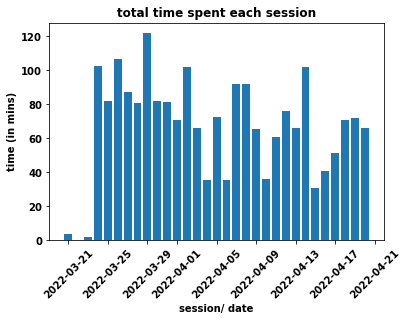

In [44]:
# plot number of games by session
plt.bar(time_groupsession['just_date'],time_groupsession['diff']);
plt.xlabel('session/ date')
plt.xticks(rotation=45)
# plt.yticks(range(0,20))
# plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.ylabel('time (in mins)');
plt.title('total time spent each session');
plt.show();

##### total time spent on play

In [45]:
total_time = time_session[['diff']].sum()
print(f'total time spent = {total_time[0]:.2f} mins')

total time spent = 2055.08 mins


In [46]:
days = math.floor(total_time[0] / (24*60))
leftover_minutes = total_time[0] % (24*60)

hours = math.floor(leftover_minutes / 60)
mins = total_time[0] - (days*1440) - (hours*60)

print(f'total time spent = {days} days, {hours:.2f} hours, {mins:.2f} mins')

total time spent = 1 days, 10.00 hours, 15.08 mins


##### time spend by game

In [47]:
time_gamesession = time_session.groupby(['game_nr']).sum().reset_index()
time_gamesession.index = time_gamesession.index.map(game_id_dict)
time_gamesession.drop(columns=['session_nr'])

,game_nr,diff
Explore the World,0,613.433333
Fishing Game,1,588.150000
Drone Game,2,853.500000


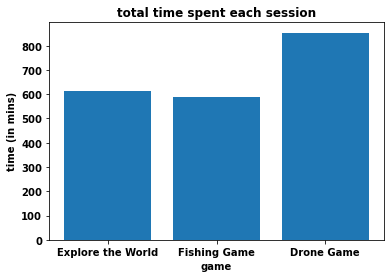

In [48]:
# plot number of games by session
plt.bar(time_gamesession.index,time_gamesession['diff']);
plt.xlabel('game')
plt.ylabel('time (in mins)');
plt.title('total time spent each session');
plt.show();

##### number of times each game was played

In [49]:
time_gamecount = time_session.groupby(['game_nr']).count().reset_index()
time_gamecount.index = time_gamecount.index.map(game_id_dict)
time_gamecount.drop(columns=['session_nr','end','diff','just_date'])

,game_nr,start
Explore the World,0,64
Fishing Game,1,58
Drone Game,2,61


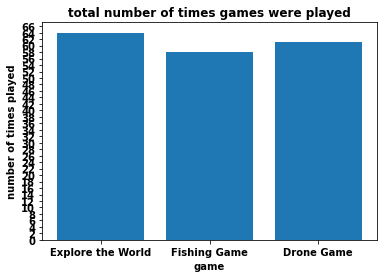

In [50]:
# plot number of games by session
plt.bar(time_gamecount.index,time_gamecount['session_nr']);
plt.xlabel('game')
plt.ylabel('number of times played');
plt.gca().yaxis.set_major_locator(mticker.MultipleLocator(2))
plt.title('total number of times games were played');
plt.show();

In [51]:
print(datetime.now()-start_codes)

0:04:24.325556
